In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from snippets import (getTopWordsByCategory, 
                      plotTopWordsByCategory, plotTopWords, 
                      plotClassShares, printSampleComments,
                      plotSetIntersections, calculateUncertanityCoeff,
                      plotUncertanityCoeff)

from bag_of_words import (calculateTFIDFscore, fitModel, NbSvmClassifier)
import bag_of_words
from load_data import loadData

from config import DATA_FILE, LABELS, CONTENT, UNIQUE_ID, TEST_SIZE, C
import pyLDAvis.gensim

In [2]:
df = loadData(DATA_FILE)

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan whi the edit make under my usernam hard...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he match thi background colour I am seemi...,0,0,0,0,0,0
10,0005300084f90edc,fair use rational for imag wonju jpg thank for...,0,0,0,0,0,0
100,003f698d06c9b180,howev the moonlit edit note by golden daph be ...,0,0,0,0,0,0
1000,02baab63953460ab,rex mundi I have creat a stub on rex mundi at ...,0,0,0,0,0,0


In [4]:
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [5]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [3]:
df[CONTENT].fillna("unknown", inplace=True)

for col in LABELS:
    print("Labels for %s are: %s" % (col, ', '.join(map(str, df[col].unique()))))

Labels for toxic are: 0, 1
Labels for severe_toxic are: 0, 1
Labels for obscene are: 0, 1
Labels for threat are: 0, 1
Labels for insult are: 0, 1
Labels for identity_hate are: 0, 1


In [4]:
INNOCENT_LABEL = "innocent"
df[INNOCENT_LABEL] = (df[LABELS].sum(axis = 1) == 0).astype(int)
ALL_LABELS = LABELS + [INNOCENT_LABEL]

In [5]:
# Sample comments
printSampleComments(df, CONTENT, LABELS, 3)

TOXIC: 
fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck you all fuck

/home/magdalena/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/home/magdalena/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


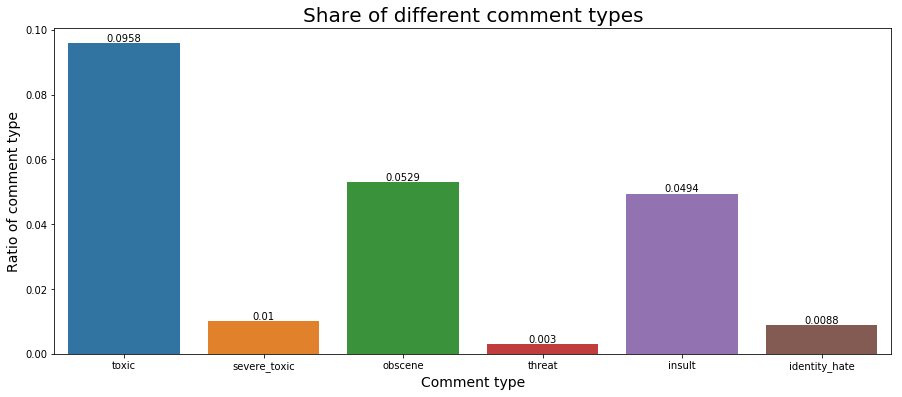

In [6]:
# Analyse share of each label
ratio = df[LABELS].mean()
plotClassShares(LABELS, ratio)

There are 159571 comments, but 35098 comment labels.


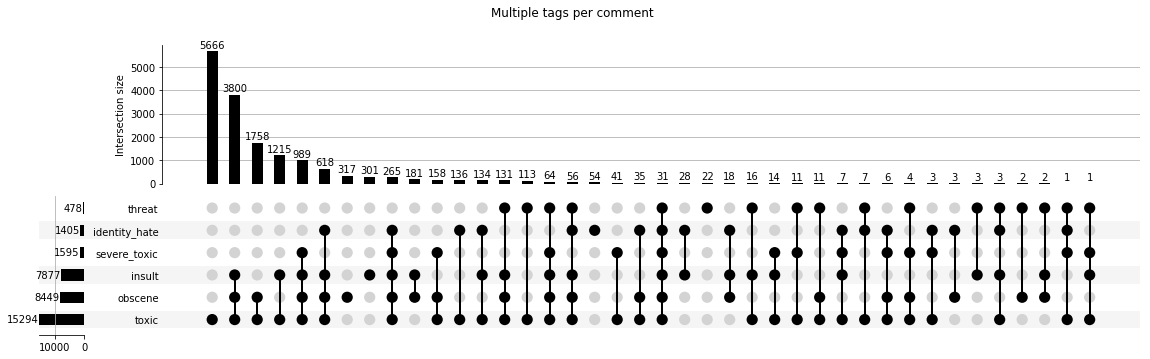

In [7]:
# Multiple labels
print("There are %s comments, but %s comment labels." % (df.shape[0], int(df.shape[0]*ratio.sum())))

df_subset = df.loc[df[INNOCENT_LABEL] == 0]    
plotSetIntersections(df_subset, LABELS, UNIQUE_ID)

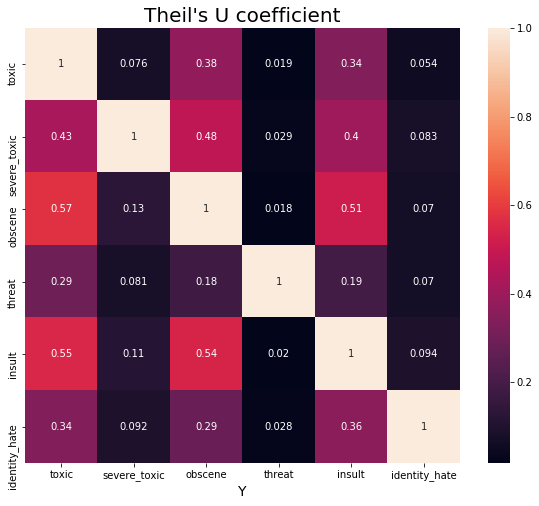

In [9]:
# Theil's U uncertanity coefficient 
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

uncertanity_coeff = calculateUncertanityCoeff(df, LABELS)
plotUncertanityCoeff(uncertanity_coeff, LABELS)

In [15]:
# Calculate TF-IDF (Term Frequency - Inverse Document Frequency) 
word_counts, features = bag_of_words.calculateTFIDFscore(df[CONTENT])

In [16]:
# Sample features
SHOW_FEATURES = 200 
for feature in features:
    print(feature)

DIGIT
I
IP
ORDER
SPAM
URL
YEAR
_
__
___
aa
aap
aaron
ab
abandon
abba
abbey
abbrevi
abc
abd
abduct
abdul
abe
abhira
abi
abid
abil
abl
abnorm
abolish
abomin
aborigin
abort
abov
abraham
abras
abroad
abrupt
absenc
absent
absolut
absolutli
absorb
abstain
abstract
absurd
abu
abund
abundantli
abus
ac
academ
academi
academia
acc
acceler
accent
accept
access
accessd
accid
accident
acclaim
accolad
accommod
accomod
accompani
accomplish
accord
accordingli
account
accredit
accumul
accur
accuraci
accus
ace
acheiv
achiev
acid
acknowledg
acorn
acoust
acquaint
acquir
acquisit
acr
acronym
act
action
activ
activist
actor
actress
actual
acupunctur
acut
ad
adam
adapt
add
addendum
addict
addit
address
adelaid
adequ
adher
adi
adigit
adjac
adject
adjust
adl
admi
admin
administ
administr
administrators_noticeboard
adminship
adminstr
admir
admiss
admit
admittedli
admonish
adolesc
adolf
adopt
ador
adress
adrian
adult
advanc
advantag
adventur
advers
adversari
advert
advertis
advic
advis
advisor
advisori
advoc
adv

catastroph
catch
categor
categori
categoris
cater
cathedr
catherin
cathol
catholic
cattl
caucasian
caucasu
caucu
caus
causal
caution
cautiou
cavalri
cave
caveat
cb
cbc
cc
cccccc
ccp
cd
cdc
cdigit
cdrtool
ce
ceas
ceil
celebr
celesti
celia
cell
cellpad
cellspac
cellular
celtic
cement
cemeteri
cena
censor
censorship
censu
censur
cent
center
centr
central
centraliststupid
centric
centrifug
centuri
ceo
ceoil
ceremoni
certain
certainli
certainti
certif
certifi
cest
cf
cfd
cfm
cg
cgi
ch
cha
chabad
chad
chain
chair
chairman
chaldean
chalk
challeng
chalukya
cham
chamar
chamber
chameleon
chameria
champ
champion
championship
chan
chanc
chancellor
chand
chang
channel
chant
chao
chaotic
chap
chapel
chapman
chapter
charact
character
characteris
characterist
charg
charit
chariti
charl
charli
charlott
charm
chart
charter
chase
chat
chatti
chauvinist
chavez
che
cheap
cheaper
cheat
cheatsheet
check
checker
checklist
checkus
cheek
cheer
chees
cheesei
chelsea
chemic
chemist
chemistri
cheroke
cherri
cheshi

efficaci
effici
effort
egg
ego
egotist
egregi
egypt
egyptian
eh
ei
eighth
einstein
ejacul
ekman
el
elabor
elder
elderli
elect
elector
electr
electromagnet
electron
eleg
eleland
element
elementari
eleph
elev
elf
eli
elig
elimin
elit
elitist
elizabeth
elkspeak
elli
elliott
elonka
eloqu
els
elsewher
elucid
elvi
elwood
em
email
emb
embarass
embarrass
embassi
embellish
emblem
embodi
embrac
emerg
emigr
emili
emilio
emin
eminem
emiss
emit
emma
emmi
emo
emot
emperor
emphas
emphasi
emphasis
emphat
empir
employ
employe
empow
empti
emul
en
enabl
enact
enclos
encod
encompass
encount
encourag
encrypt
encyclopaed
encyclopaedia
encycloped
encyclopedia
encylopedia
end
endang
endeavor
endeavour
endless
endlessli
endors
endow
endur
enemi
energi
enforc
eng
engag
engin
england
english
enhanc
enigmaman
enjoy
enlarg
enlighten
enlist
enorm
enquir
enquiri
enrich
enrol
ensembl
ensign
enslav
ensu
ensur
ent
entail
entangl
enter
enterpris
entertain
enthusiasm
enthusiast
entir
entireti
entiti
entitl
entranc
entren

implicit
implicitli
impolit
import
importantli
impos
imposs
impost
impot
impract
impress
imprison
improb
improp
improperli
improv
impuls
imput
inabl
inaccur
inaccuraci
inact
inadequ
inadvert
inan
inappropri
inaugur
incap
incarn
incent
incest
inch
incid
incident
incit
incivil
inclin
includ
inclus
inclusionist
incoher
incom
incompat
incompet
incomplet
incomprehens
inconsist
inconveni
incorpor
incorrect
incorrectli
increas
increasingli
incred
increment
incub
incumb
incur
inde
indef
indefinit
indent
independ
index
indi
india
indian
indiana
indic
indict
indiffer
indigen
indirect
indirectli
indiscrimin
indisput
individu
indo
indonesia
indonesian
indoor
indu
induc
induct
indulg
industri
ineffect
ineffici
inept
inequ
inerti
inertia
inevit
inexperienc
infact
infal
infam
infant
infantri
infect
infer
inferior
infiltr
infin
infinit
infinitesim
inflammatori
inflat
inflict
influenc
influenti
info
infobox
inform
infract
infrastructur
infring
ing
ingredi
inhabit
inher
inherit
initi
inject
injur
injuri

nam
nambla
namespac
nanci
napoleon
narr
narrat
narrow
narrowli
naruto
nasa
nasal
nascar
nash
nasti
nat
nate
nathan
nation
nationalist
nativ
nato
natur
naughti
naval
navbox
navi
navig
nawlinwiki
nay
nazi
nazism
nb
nba
nbc
nc
ncaa
ncbi
nccc
nd
ndigit
ndigitb
ndp
ne
near
nearbi
nearest
nearli
neat
neatli
nebraska
neccessari
necess
necessari
necessarili
necessit
neck
ned
need
needl
needlessli
nefari
neg
negat
neglect
neglig
negoti
negro
neighbor
neighborhood
neighbour
neighbourhood
neil
neiln
nelli
nelson
neo
neolog
nepal
nephew
nerd
nerv
nervou
nescio
ness
nest
net
netherland
network
neural
neurolog
neuter
neutral
neutron
nevada
nevermind
new
newbi
newcastl
newcom
newer
newest
newli
newman
news
newslett
newspap
newsweek
newsworthi
newton
nfcc
nfl
ng
ngo
nguyen
nh
nhl
nhrhsyear
ni
nic
nicaragua
nice
nicer
nich
nichola
nick
nicki
nicknam
nicol
nicola
nicosia
niger
nigeria
nigga
niggaz
nigger
night
nightmar
nih
nikko
nikola
nikumaroro
nil
nina
nineteenth
ninja
nintendo
ninth
nippl
nirvana
ni

repetit
rephras
replac
replay
repli
replic
report
reportedli
repositori
repost
repres
represent
repress
reprimand
reprint
reproduc
reproduct
republ
republican
repuls
reput
request
requir
requisit
reread
rescu
research
resembl
resent
reserv
reset
resid
residenti
resign
resist
resolut
resolv
reson
resort
resourc
respect
respond
respons
rest
restart
restat
restaur
restor
restrain
restraint
restrict
restructur
resubmit
result
resum
resurrect
retail
retain
retali
retard
retent
rethink
retir
retitl
retort
retract
retreat
retriev
retroact
retrospect
return
reus
reuter
rev
revamp
reveal
revel
reveng
revenu
rever
reverend
revers
revert
review
revis
revision
revisionist
revisit
reviv
revok
revolt
revolut
revolutionari
revolv
reward
reword
rework
rewrit
rex
rexcurri
rey
reynold
rf
rfa
rfar
rfc
rfcu
rfd
rfpp
rgb
rhaworth
rhetor
rhobit
rhode
rhyme
rhythm
ri
riana
ribbon
rican
ricardo
rice
rich
richard
richi
richmond
rick
ricki
rickk
rico
rid
riddl
ride
rider
ridicul
rifl
rig
right
righteou
rightli


ther
therapeut
therapi
therapist
thereaft
therebi
theredpenofdoom
therefor
thereof
theresa
thermal
thermodynam
thesi
thf
thi
thief
thier
thing
thingi
think
thinker
thirdli
thirteen
thirti
tho
thoma
thompson
thomson
thon
thor
thorn
thorough
thoroughli
thou
thought
thousand
thrace
thracian
thrash
thread
threat
threaten
threshold
thrill
thriller
thrive
throat
throne
throw
thrust
thruster
thu
thug
thumb
thumbnail
thunder
thursday
thwart
thx
ti
tibet
tibetan
tick
ticket
tidbit
tide
tidi
tie
tier
tiger
tight
tighten
til
tild
till
tilt
tim
time
timelin
timer
timestamp
timothi
tin
tini
tinker
tip
tipler
tirad
tire
tireless
tiresom
tissu
tit
titan
titl
tito
tj
tk
tl
tlk
tm
tna
tobacco
tobi
toc
tod
today
todd
toddstdigit
toe
togeth
toilet
token
tokyo
toler
tolkien
toll
tom
tomato
tomb
tome
tommi
tommyyear
tomorrow
ton
tone
tongu
toni
tonight
tool
toolbar
toolserv
tooth
topic
topolog
tor
torah
torch
tori
tornado
toronto
torrent
tort
tortur
tosa
toss
tosser
total
totalitarian
touch
touchi
tough
to

In [18]:
# Get most common words
NUM_WORDS_CAT = 10
NUM_WORDS_ALL = 20
words, counts = getTopWordsByCategory(df, LABELS, word_counts, features, NUM_WORDS_CAT)
words_all, counts_all = getTopWordsByCategory(df, LABELS, word_counts, features, NUM_WORDS_ALL, aggregate = True)

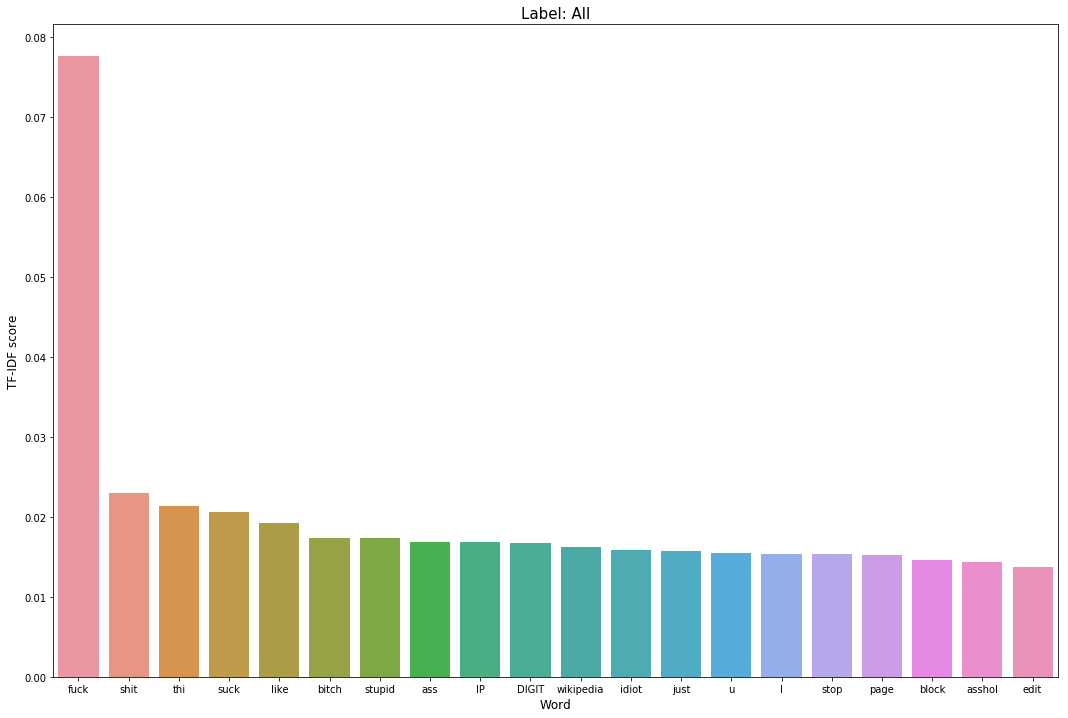

In [19]:
plotTopWords(words_all[0], counts_all[0], "All")

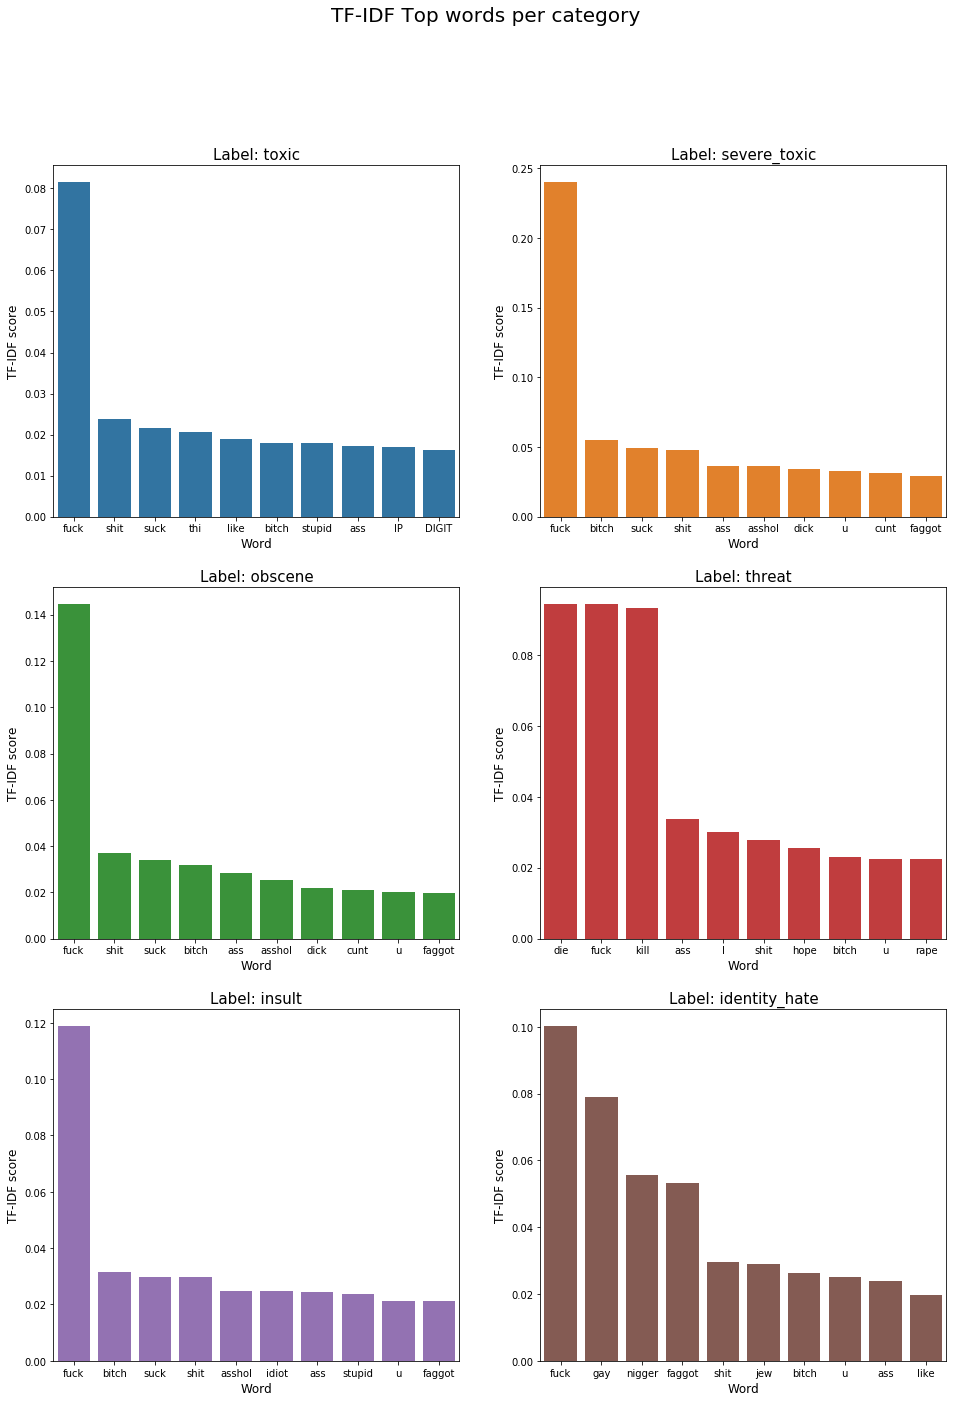

In [20]:
plotTopWordsByCategory(words, counts, LABELS)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(word_counts, df[LABELS], test_size = TEST_SIZE, random_state=123)
model = bag_of_words.NbSvmClassifier(C=C)
metrics_train, metrics_test, measures = bag_of_words.fitModel(model, X_train, X_test, y_train, y_test, LABELS)

Class: toxic
Log loss: 0.08889079058313493
Class: severe_toxic
Log loss: 0.016514142694954423
Class: obscene
Log loss: 0.04276308167253272
Class: threat
Log loss: 0.0037330628843515417
Class: insult
Log loss: 0.05938804742948023
Class: identity_hate
Log loss: 0.013088291881505586


In [26]:
print("Model performance on training set")
pd.DataFrame(metrics_train, columns = LABELS, index = measures)

Model performance on training set


,toxic,severe_toxic,obscene,threat,insult,identity_hate
Accuracy,0.966747,0.993075,0.984623,0.998747,0.977197,0.995065
F1 score,0.808654,0.588071,0.844712,0.755352,0.741818,0.653846
Precision,0.734343,0.489907,0.789676,0.644909,0.666560,0.531250
Recall,0.899699,0.735431,0.907993,0.911439,0.836233,0.850000


In [27]:
print("Model performance on test set")
pd.DataFrame(metrics_test, columns = LABELS, index = measures)

Model performance on test set


,toxic,severe_toxic,obscene,threat,insult,identity_hate
Accuracy,0.961742,0.990318,0.980103,0.997211,0.971017,0.991822
F1 score,0.781065,0.388119,0.796148,0.386207,0.673951,0.391608
Precision,0.707373,0.319218,0.734597,0.294737,0.596382,0.294737
Recall,0.871898,0.494949,0.868956,0.560000,0.774716,0.583333


In [13]:
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from config import STOP_WORDS

def dummy_toc(doc):
    doc = doc.split()
    clean_text = [word for word in doc if not word in STOP_WORDS]
    return clean_text

tokenized_text = df[CONTENT].apply(lambda x: dummy_toc(x))

In [15]:
dictionary = Dictionary(tokenized_text)

In [16]:
corpus = [dictionary.doc2bow(text) for text in tokenized_text]
ldamodel = LdaModel(corpus=corpus, num_topics=15, id2word=dictionary)

In [17]:
topic_probability = ldamodel[corpus]
topic_probability = gensim.matutils.corpus2csc(topic_probability)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(topic_probability.transpose(), df[LABELS], test_size = TEST_SIZE, random_state=123)

In [21]:
model = bag_of_words.NbSvmClassifier(C=C)
metrics_train, metrics_test, measures = bag_of_words.fitModel(model, X_train, X_test, y_train, y_test, LABELS)

Class: toxic
Log loss: 0.2035000227910485
Class: severe_toxic
Log loss: 0.03463435760270726
Class: obscene
Log loss: 0.12864760483637816
Class: threat
Log loss: 0.016709133176247833


/home/magdalena/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/magdalena/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/magdalena/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/magdalena/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Class: insult
Log loss: 0.12350244003497879
Class: identity_hate
Log loss: 0.03844738193357352


In [22]:
print("Model performance on training set")
pd.DataFrame(metrics_train, columns = LABELS, index = measures)

Model performance on training set


,toxic,severe_toxic,obscene,threat,insult,identity_hate
Accuracy,0.927829,0.989174,0.955388,0.997,0.957260,0.991038
F1 score,0.499864,0.211187,0.443032,0.000,0.418337,0.030508
Precision,0.376914,0.143634,0.335010,0.000,0.312719,0.016071
Recall,0.741863,0.398707,0.653868,0.000,0.631681,0.300000


In [24]:
print("Model performance on test set")
pd.DataFrame(metrics_test, columns = LABELS, index = measures)

Model performance on test set


,toxic,severe_toxic,obscene,threat,insult,identity_hate
Accuracy,0.928216,0.989159,0.957543,0.997023,0.957982,0.990757
F1 score,0.507841,0.220721,0.469667,0.000000,0.440551,0.006734
Precision,0.383891,0.159609,0.355450,0.000000,0.329382,0.003509
Recall,0.750000,0.357664,0.692042,0.000000,0.664987,0.083333


In [27]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/home/magdalena/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.207102  0.010194       1        1  29.682013
7     -0.182631 -0.133304       2        1  15.801498
12    -0.197891 -0.090512       3        1  11.178890
3     -0.184308  0.094448       4        1  10.179778
2     -0.200495  0.005564       5        1   9.613842
4     -0.163726  0.153631       6        1   8.523156
10    -0.139450 -0.106956       7        1   4.512005
11    -0.139710  0.043532       8        1   3.233486
1      0.059316 -0.140655       9        1   2.525562
8      0.129074  0.315466      10        1   1.698070
9      0.045247  0.060498      11        1   0.890861
0      0.176549 -0.184641      12        1   0.865083
5      0.247263 -0.022785      13        1   0.491035
6      0.372372  0.034773      14        1   0.461893
13     0.385491 -0.039253      15        1   0.342830, topic_info=     Category           Freq       Term          Total  loglift  logprob
term                                                                    
6     Default  482198.000000         be  482198.000000  30.0000  30.0000
187   Default  227309.000000        you  227309.000000  29.0000  29.0000
57    Default  229659.000000          a  229659.000000  28.0000  28.0000
43    Default   99209.000000      DIGIT   99209.000000  27.0000  27.0000
34    Default  522136.000000        the  522136.000000  26.0000  26.0000
44    Default   33253.000000       YEAR   33253.000000  25.0000  25.0000
293   Default   66102.000000       your   66102.000000  24.0000  24.0000
130   Default  237441.000000         of  237441.000000  23.0000  23.0000
164   Default  309998.000000         to  309998.000000  22.0000  22.0000
20    Default   47434.000000         my   47434.000000  21.0000  21.0000
65    Default   77714.000000     articl   77714.000000  20.0000  20.0000
10    Default   43382.000000       edit   43382.000000  19.0000  19.0000
183   Default   48944.000000  wikipedia   48944.000000  18.0000  18.0000
25    Default   58194.000000       page   58194.000000  17.0000  17.0000
862   Default   16259.000000       fuck   16259.000000  16.0000  16.0000
102   Default   24352.000000         go   24352.000000  15.0000  15.0000
173   Default   36803.000000        use   36803.000000  14.0000  14.0000
4     Default  234271.000000        and  234271.000000  13.0000  13.0000
8     Default  105383.000000         do  105383.000000  12.0000  12.0000
32    Default   41120.000000       talk   41120.000000  11.0000  11.0000
109   Default  154087.000000         in  154087.000000  10.0000  10.0000
87    Default   26963.000000      delet   26963.000000   9.0000   9.0000
108   Default   15358.000000       imag   15358.000000   8.0000   8.0000
112   Default  167756.000000         it  167756.000000   7.0000   7.0000
98    Default  105153.000000        for  105153.000000   6.0000   6.0000
107   Default   60635.000000         if   60635.000000   5.0000   5.0000
410   Default   22982.000000        get   22982.000000   4.0000   4.0000
0     Default   36411.000000          I   36411.000000   3.0000   3.0000
158   Default  170744.000000       that  170744.000000   2.0000   2.0000
195   Default   19892.000000         up   19892.000000   1.0000   1.0000
...       ...            ...        ...            ...      ...      ...
3732  Topic15     330.196411       appl     331.200897   5.6727  -4.7067
3943  Topic15     215.352066   backward     216.349930   5.6711  -5.1341
9057  Topic15     188.461517     forest     189.459915   5.6704  -5.2675
2747  Topic15     177.562607    canvass     178.561737   5.6701  -5.3271
838   Topic15     164.496674     talent     165.494553   5.6696  -5.4035
6937  Topic15     140.353470       fate     141.351334   5.6686  -5.5623
1742  Topic15     140.298096      randi     141.344604   5.6683  -5.5627
7830  Topic15     129.677887       buzz     130.675751   5.6680  -5.6414
6287  Topic15     111.672020       beef     11

In [ ]:
# TO DO:
# Implement LSTM